In [1]:
%pip list

Package                      Version
---------------------------- ------------
absl-py                      1.4.0
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.4
contourpy                    1.1.0
cycler                       0.11.0
debugpy                      1.8.0
decorator                    5.1.1
exceptiongroup               1.1.3
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.42.1
gast                         0.4.0
google-auth                  2.23.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.58.0
h5py                         3.9.0
idna                         3.4
ipykernel                    6.25.2
ipython                      8.15.0
j

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
# Function to list all the files/floders present in a directory.
os.listdir(r'C:\Users\navee\OneDrive\Desktop\Naveen\SIH2023')

['.idea', '.venv', 'data', 'logs', 'main.py', 'nb.ipynb']

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 1. Removing Dodgy Images

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data'
os.listdir(data_dir)

['Dirty_ponds_or_lakes', 'Drainage', 'Floods', 'Infrastructure_problem']

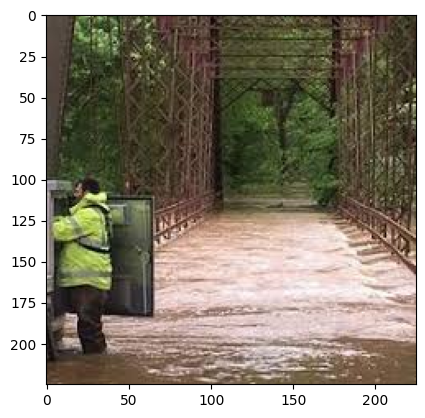

In [8]:
img1 = cv2.imread(os.path.join(data_dir, 'Floods', 'image4(182).jpg'))
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
img_extn = ['jpeg', 'JPEG', 'png', 'PNG' 'jpg', 'JPG', 'bmp', 'BMP']
for img_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, image)
        try:
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in img_extn:
                print('Image not in ext list {}'.format(img_path))
                os.remove(img_path)
        except Exception as e:
            print('Issue with image {}'.format(img_path))

In [10]:
# Building our data pipeline
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1068 files belonging to 4 classes.


In [11]:
# Accessing data pipeline
data_itr = data.as_numpy_iterator()
batch = data_itr.next()

In [12]:
# The 2 in the output represent 2 parts of our dataset , one being features and othre being label
len(batch)

2

In [13]:
batch[1].shape

(32,)

0 = Dirty ponds/lakes

1 = Drainage

2 = Flood

3 = Infrastructure_problem

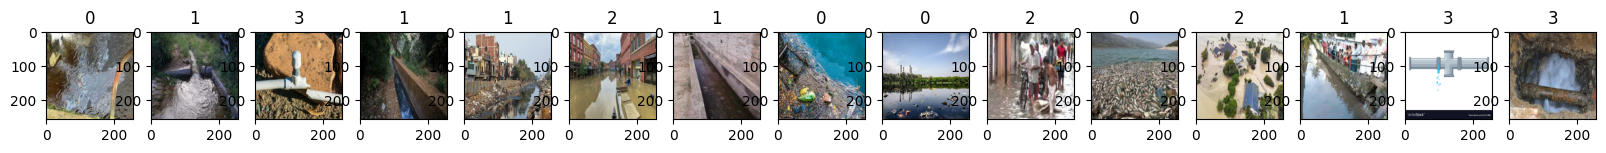

In [14]:
fig, ax = plt.subplots(ncols=15, figsize = (20,20))
for idx, img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Data Preprocessing

In [15]:
#Scaling values between 0 and 1
data = data.map(lambda x,y : (x/255,y)) # x = images as numpy array, y = labels

In [16]:
scaled_iterator = data.as_numpy_iterator().next()

In [17]:
scaled_iterator[0].max()

1.0

#### Splitting DATA for Training and Testing

In [18]:
len(data) # We have 41 batches and each batch has 32 images

34

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [20]:
test_size + val_size + train_size

34

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [22]:
len(val)

7

## 3. Deep Learning Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
# model.add(Dense(1, activavtion = 'sigmoid'))
model.add(Dense(4, activation='softmax'))

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
#Training
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) 

Epoch 1/20
23/23 [==============================] - 12s 110ms/step - loss: 1.5026 - accuracy: 0.3111 - val_loss: 1.3217 - val_accuracy: 0.3616
Epoch 2/20
23/23 [==============================] - 3s 105ms/step - loss: 1.2699 - accuracy: 0.4239 - val_loss: 1.2703 - val_accuracy: 0.4554
Epoch 3/20
23/23 [==============================] - 3s 103ms/step - loss: 1.1859 - accuracy: 0.4633 - val_loss: 1.0420 - val_accuracy: 0.5625
Epoch 4/20
23/23 [==============================] - 3s 107ms/step - loss: 1.0105 - accuracy: 0.5910 - val_loss: 1.0509 - val_accuracy: 0.6116
Epoch 5/20
23/23 [==============================] - 3s 105ms/step - loss: 0.8274 - accuracy: 0.6957 - val_loss: 0.9252 - val_accuracy: 0.6250
Epoch 6/20
23/23 [==============================] - 3s 107ms/step - loss: 0.5894 - accuracy: 0.7717 - val_loss: 0.8128 - val_accuracy: 0.7143
Epoch 7/20
23/23 [==============================] - 3s 106ms/step - loss: 0.3844 - accuracy: 0.8696 - val_loss: 0.6981 - val_accuracy: 0.7366
Epoch

In [28]:
hist

#### Performance Plot

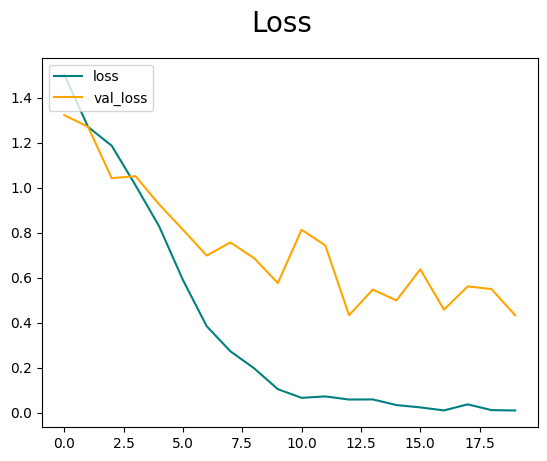

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

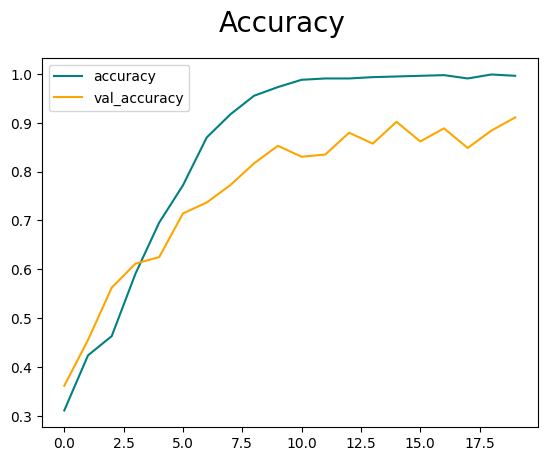

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 4. Evaluate Performance

#### Evaluate

In [31]:
from tensorflow.keras.metrics import Precision, Recall

In [32]:
precision = Precision()
recall = Recall()

In [33]:
len(test)

4

In [34]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    predy = []
    for lst in yhat:
        i = -1
        maxi = -1e20
        ct = 0
        for ele in lst:
            if ele > maxi:
                i = ct
                maxi = ele
            ct = ct + 1
        predy.append(i)
    precision.update_state(y, predy)
    # print(predy)
    # print(y)
    # print(yhat)
    recall.update_state(y, predy)
    # accuracy.update_state(y, yhat)
    break

1/1 [==============================] - 0s 125ms/step


In [35]:
print(precision.result().numpy(), recall.result().numpy())

0.9130435 1.0


#### Test

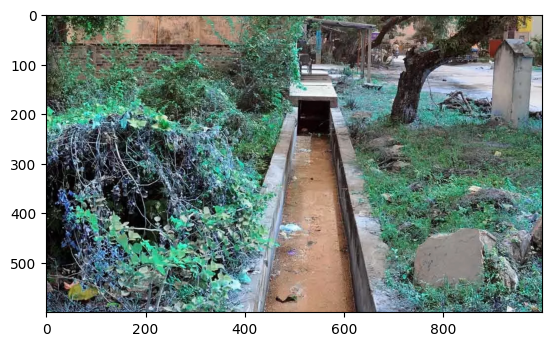

In [36]:
img = cv2.imread(r'C:\Users\navee\Downloads\re.jpg')
plt.imshow(img)
plt.show()

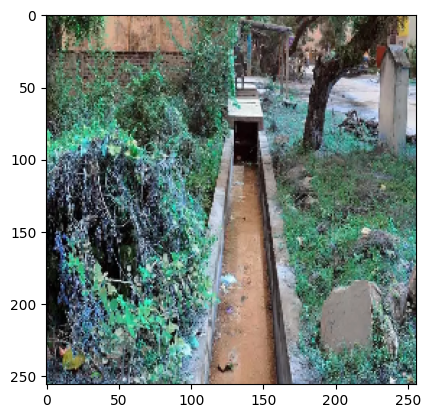

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
def get_prediction(yhat):
    ct = 0
    maxi = -1e20
    i = -1
    for ele in yhat[0]:
        if ele > maxi:
            i = ct
            maxi = ele
        ct = ct+1
    return i

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0))
ans = get_prediction(yhat)
if(ans == 0):
    print("The image is of dirty pond/lake")
elif ans == 1:
    print("The image is of drainage")
elif ans == 2:
    print("The image is of flood")
else:
    print("The image is of burst pipe/infrastructure problem")
# print(yhat)

1/1 [==============================] - 0s 301ms/step
The image is of drainage


In [40]:
from tensorflow.keras.models import load_model

In [41]:
model.save(os.path.join('model', 'water_problem_classifier.h5'))

In [42]:
test_new_model = load_model(os.path.join('model', 'water_problem_classifier.h5'))

In [43]:
test_new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 53ms/step


array([[8.9118088e-04, 9.9910659e-01, 1.8851764e-06, 4.0114875e-07]],
      dtype=float32)

## Building the Data Pipeline

In [145]:
class Model_Pipeline:
    def __init__(self):
        self.img_path = 'test_images'
        self.image = None
    
    def load_image(self, path_of_img):
        tip = imghdr.what(path_of_img)
        
        if tip not in img_extn:
            input_image_path = path_of_img
            
            from PIL import Image
            
            # Open the non-JPG image
            input_image = Image.open(input_image_path) 
            
            # Get the file name and extension from the input image path
            file_name, file_extension = os.path.splitext(input_image_path)
            
            # Save as JPG with the same file name
            output_image_path = f'{file_name}.jpg'
            input_image.save(output_image_path, 'JPEG')
        
        self.image = cv2.imread(path_of_img)
        # plt.imshow(self.image)
    
            
    def resize_image(self, target_size=(256, 256)):
        self.image = tf.image.resize(self.image, target_size)
        
    def get_prediction(self, yhat):
        ct = 0
        maxi = -1e20
        i = -1
        for ele in yhat[0]:
            if ele > maxi:
                i = ct
                maxi = ele
            ct = ct+1
        return i
    
    def predict(self, model):
        # Check if the image exist and is of correct format in jpg, png, bmp, jpeg.
        image_exist = 0
        
        for image in os.listdir(os.path.join('test_images')):
            img_path = os.path.join('test_images', image)
            # print(img_path)
            
            if os.path.exists(img_path):
                image_exist = 1
                self.load_image(img_path)
                
                # Now we have the image, lets resize it.
                self.resize_image()                
                
                # Now let's predict the image as a correct water problem.
                yhat = model.predict(np.expand_dims(self.image/255, 0))
                ans = self.get_prediction(yhat)
                if(ans == 0):
                    print("The image is of dirty pond/lake")
                elif ans == 1:
                    print("The image is of drainage")
                elif ans == 2:
                    print("The image is of flood")
                else:
                    print("The image is of burst pipe/infrastructure problem")
            
        if image_exist == 0:
            print("No image present in the directory.")
        
    
    

In [147]:
pipe = Model_Pipeline()
pipe.predict(model)
# print(pipe.image)

1/1 [==============================] - 0s 16ms/step
The image is of flood
1/1 [==============================] - 0s 16ms/step
The image is of drainage
